In [ ]:
##########################################
##
## (1) 김보겸
##
##########################################

In [ ]:
##########################################
##
## (2) 김지유
##
##########################################

'X' shape: (569, 5)
'y' shape: (569,)


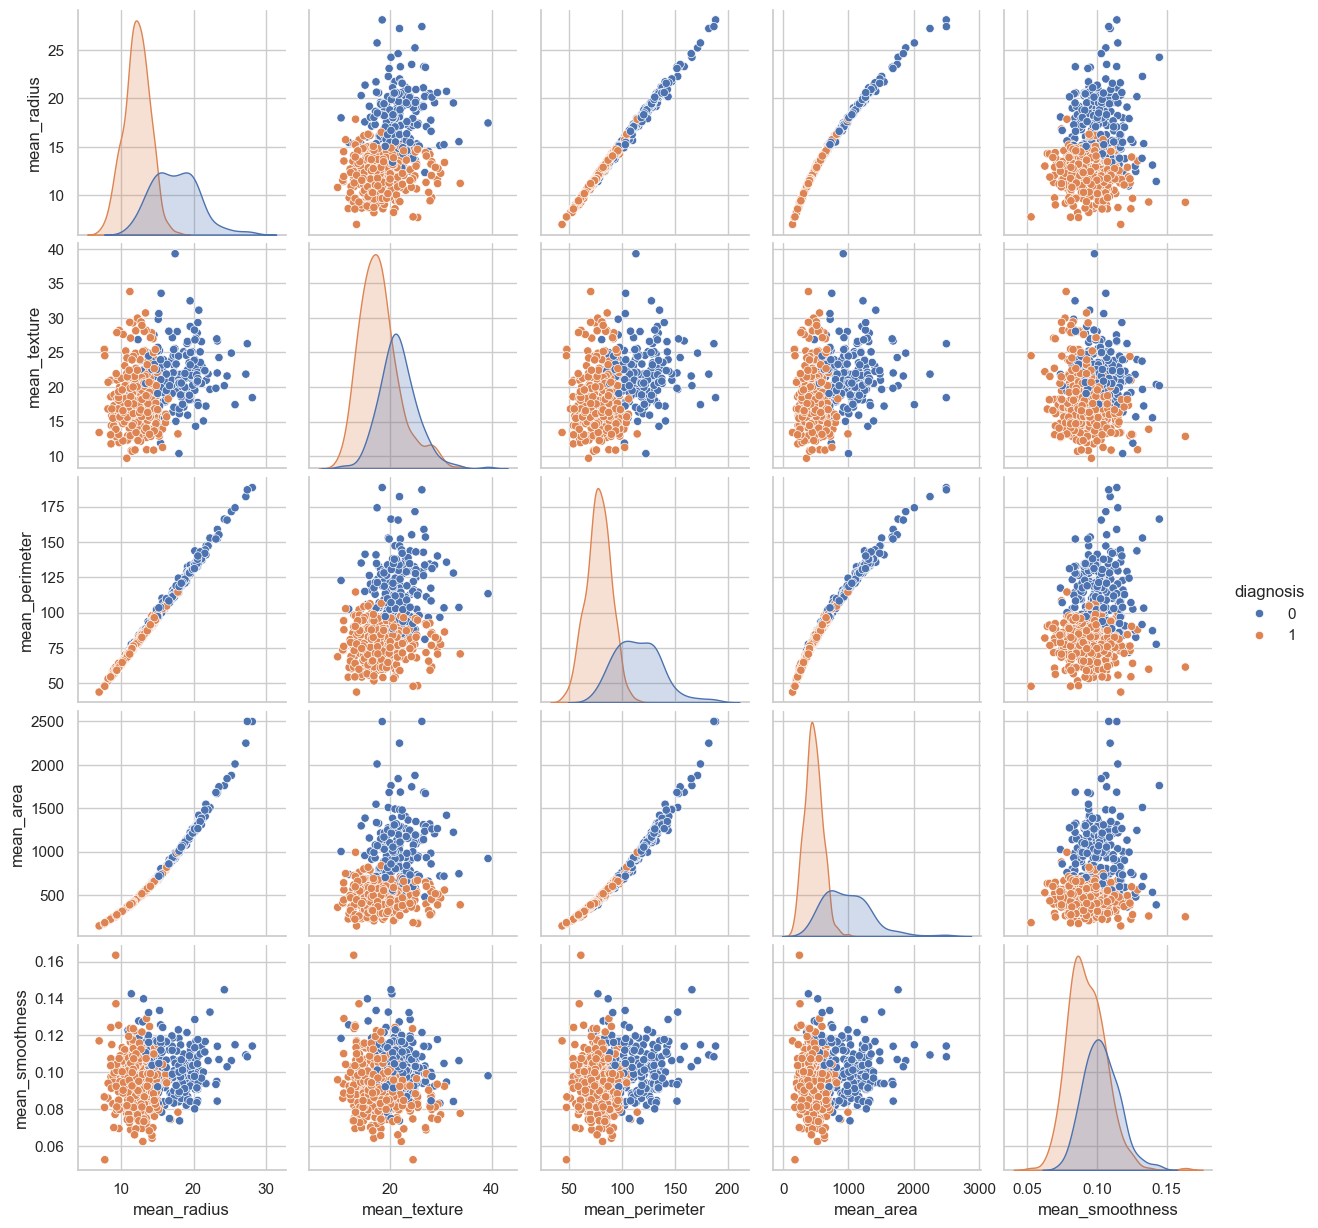

In [42]:
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

# df = pd.read_csv('/content/drive/MyDrive/1.cancer/Breast_cancer_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-15/Breast_cancer_data.csv')
# df.head()
# df.columns
# df.describe()

sns.pairplot(df, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])


In [50]:
#학습용 데이터와 테스트용 데이터 분리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

X= df.drop('diagnosis', axis=1)
y= df.diagnosis

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#정확도와 예측결과와 실제값의 관계를 행렬로 표현
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#support vector machine -> 분류 문제
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

#다양한 커널(kernel)을 사용해 데이터의 비선형 관계를 학습
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)


'X' shape: (569, 5)
'y' shape: (569,)
Train Result:
Accuracy Score: 80.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.986486    0.765432  0.806533    0.875959      0.848189
recall       0.489933    0.995984  0.806533    0.742958      0.806533
f1-score     0.654709    0.865620  0.806533    0.760164      0.786660
support    149.000000  249.000000  0.806533  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[ 73  76]
 [  1 248]]

Test Result:
Accuracy Score: 80.70%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.765957  0.807018    0.882979      0.852184
recall      0.476190    1.000000  0.807018    0.738095      0.807018
f1-score    0.645161    0.867470  0.807018    0.756316      0.785567
support    63.000000  108.000

C:\Users\BOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Result:
Accuracy Score: 91.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.908451    0.921875  0.917085    0.915163      0.916849
recall       0.865772    0.947791  0.917085    0.906781      0.917085
f1-score     0.886598    0.934653  0.917085    0.910626      0.916663
support    149.000000  249.000000  0.917085  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[129  20]
 [ 13 236]]

Test Result:
Accuracy Score: 94.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.907692    0.962264   0.94152    0.934978      0.942159
recall      0.936508    0.944444   0.94152    0.940476      0.941520
f1-score    0.921875    0.953271   0.94152    0.937573      0.941704
support    63.000000  108.000000   0.94152  171.000000    171.00000

In [56]:
#rbf-> 가우시안 커널
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

#모델, 하이퍼파라미터, 교차 검증 설정
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.46%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.913208  0.924623    0.930288      0.925996
recall       0.845638    0.971888  0.924623    0.908763      0.924623
f1-score     0.893617    0.941634  0.924623    0.917626      0.923658
support    149.000000  249.000000  0.924623  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[126  23]
 [  7 242]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.955752   0.97076    0.977876      0.972054
recall      0.920635    1.000000   0.97076    0.960317      0.970760
f1-score    0.958678    0.977376   0.97076    0.968027      0.970487
support    63.000000  108.000000   0.97076  171.000000    171.00000

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Train Result:
Accuracy Score: 92.46%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.928058    0.922780  0.924623    0.925419      0.924756
recall       0.865772    0.959839  0.924623    0.912806      0.924623
f1-score     0.895833    0.940945  0.924623    0.918389      0.924056
support    149.000000  249.000000  0.924623  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[129  20]
 [ 10 239]]

Test Result:
Accuracy Score: 94.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.934426    0.945455   0.94152    0.939940      0.941391
recall      0.904762    0.962963   0.94152    0.933862      0.941520
f1-score    0.9193

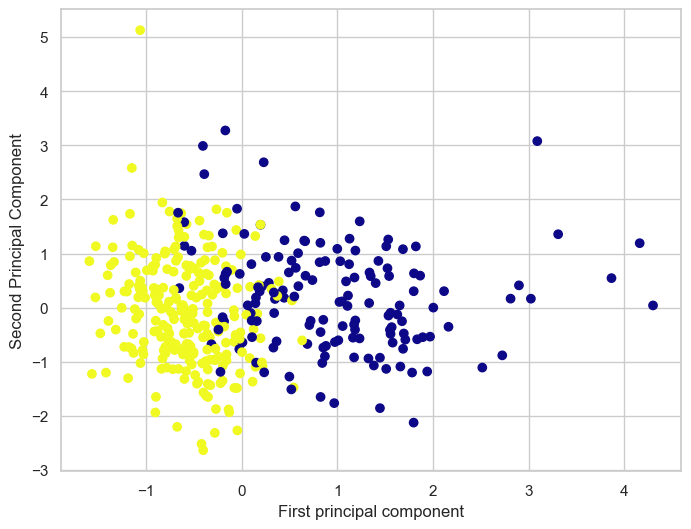

In [60]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#pca 입력 데이터 차원 축소 표준화
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
##########################################
##
## (3) 유신평
##
##########################################

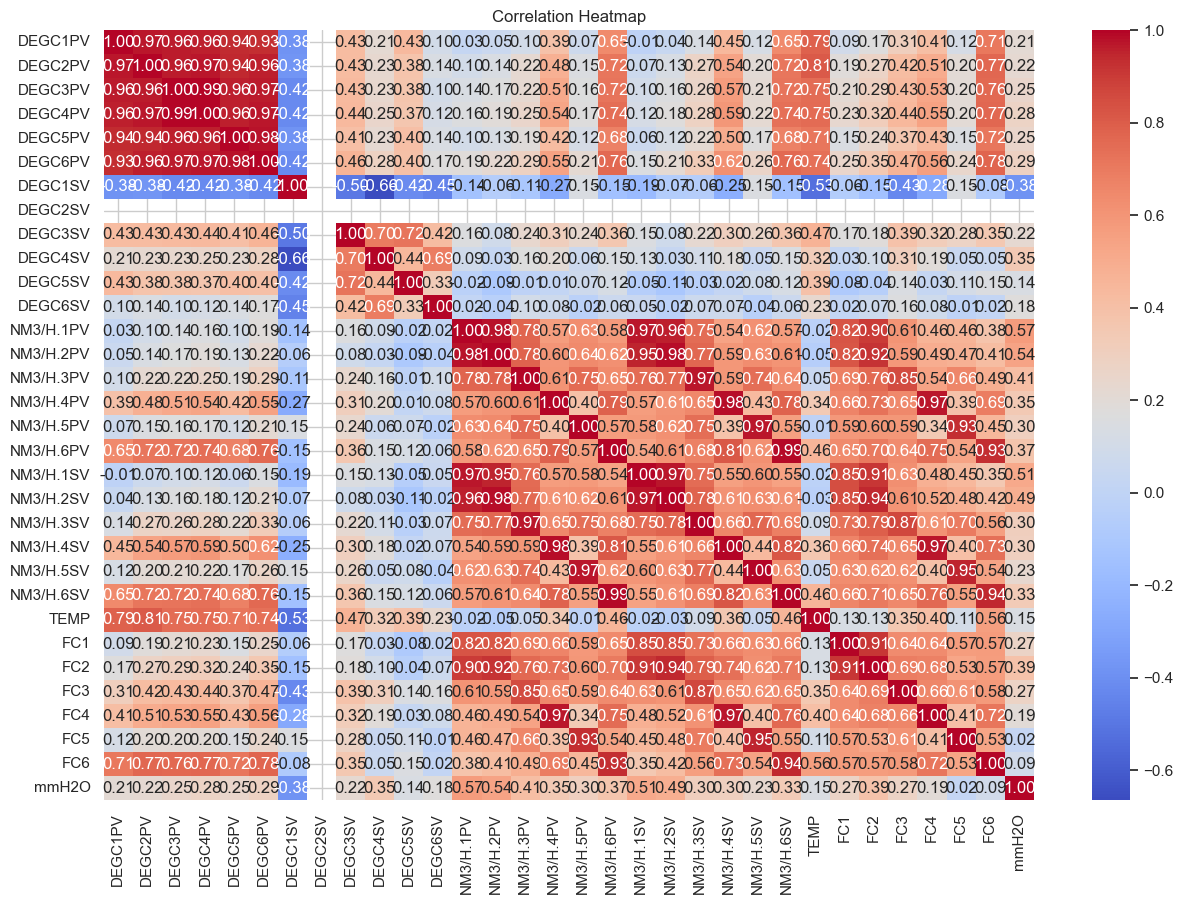

In [68]:
##########################################
##
## (4) 김영란
##
##########################################
import pandas as pd

#1. 캐글 데이터 셋 로드
train_df = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-15/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-15/test.csv')
train_df.head()

# Check for missing values
train_df.isnull().sum()

#2. 시각화
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
#3. ML모델 선정 : LinearRegression, DecisionTreeRegression 선정
#4. 데이터셋 분리 : 이미 데이터가 학습 데이터와 훈련 데이터로 분리되어 있음.
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Define features and target variable
X = train_df.drop('mmH2O', axis=1)
y = train_df['mmH2O']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    me = np.mean(y_pred - y_true)  # 평균 오차 (예측값 - 실제값)
    mae = mean_absolute_error(y_true, y_pred)  # 평균 절대 오차
    mse = mean_squared_error(y_true, y_pred)  # 평균 제곱 오차
    rmse = np.sqrt(mse)  # 평균 제곱근 오차

    # Conditional MSLE calculation
    if (y_true > 0).all() and (y_pred > 0).all():
        msle = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))  # 평균 제곱 오차 (로그 적용)
        rmsle = np.sqrt(msle)  # 평균 제곱근 오차 (로그 적용)
    else:
        msle = np.nan
        rmsle = np.nan

    mpe = np.mean((y_pred - y_true) / y_true) * 100  # 평균 비율 오차
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # 평균 절대 비율 오차
    r2 = r2_score(y_true, y_pred)  # R2 점수
    return {
        "ME": me,
        "MAE": mae,
        "MSE": mse,
        "MSLE": msle,
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MPE": mpe,
        "MAPE": mape,
        "R2": r2
    }

# Initialize models
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor()
}

#5.학습실행( Train and evaluate models)
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check for invalid prediction values
    if (y_pred < 0).any():
        print(f"Warning: Model {name} produced negative predictions. Adjusting values to zero.")
        y_pred = np.maximum(y_pred, 0)  # Replace negative predictions with 0

    results[name] = evaluate_model(y_test, y_pred)

# Format evaluation results for consistent decimal places
evaluation_results = pd.DataFrame(results)
evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")

# Display formatted results
print("\nModel Evaluation Results:")
print(evaluation_results)

# Add explanations for each metric in Korean
metric_explanations = {
    "ME": "평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.",
    "MAE": "평균 절대 오차 (Mean Absolute Error): 예측값과 실제값의 절대적 차이의 평균. 낮을수록 좋음.",
    "MSE": "평균 제곱 오차 (Mean Squared Error): 예측값과 실제값의 제곱 차이 평균. 낮을수록 좋음.",
    "MSLE": "평균 제곱 오차 (로그 적용, Mean Squared Log Error): 로그 스케일에서의 평균 제곱 오차. 낮을수록 좋음.",
    "RMSE": "평균 제곱근 오차 (Root Mean Squared Error): 평균 제곱 오차의 제곱근. 낮을수록 좋음.",
    "RMSLE": "평균 제곱근 오차 (로그 적용, Root Mean Squared Log Error): 로그 스케일에서의 제곱근 오차. 낮을수록 좋음.",
    "MPE": "평균 비율 오차 (Mean Percentage Error): 예측값과 실제값의 비율 오차 평균. 0에 가까울수록 좋음.",
    "MAPE": "평균 절대 비율 오차 (Mean Absolute Percentage Error): 절대 비율 오차의 평균. 낮을수록 좋음.",
    "R2": "R2 점수 (Coefficient of Determination): 모델의 설명력을 나타냄. 1에 가까울수록 좋음.",
}

# Append explanations to results
print("\nModel Evaluation Results with Explanations:")
for metric, explanation in metric_explanations.items():
    print(f"{metric}: {explanation}")
    print(evaluation_results.loc[metric])
    print()

#6. 새 데이터로 예측(Prediction)
test_input = pd.DataFrame(
    [[784,726.8,875.1,880.1,656.3,611.7,1005,1070,1215,1200,1140,1130,2566,2289,2646,7542,1598,3302,2600,2200,2001,2450,1600,3298,509.9,12.1,7,15,20.2,4.6,24.6]],
    columns=['DEGC1PV','DEGC2PV','DEGC3PV','DEGC4PV','DEGC5PV','DEGC6PV','DEGC1SV','DEGC2SV','DEGC3SV','DEGC4SV','DEGC5SV','DEGC6SV','NM3/H.1PV','NM3/H.2PV','NM3/H.3PV','NM3/H.4PV','NM3/H.5PV','NM3/H.6PV','NM3/H.1SV','NM3/H.2SV','NM3/H.3SV','NM3/H.4SV','NM3/H.5SV','NM3/H.6SV','TEMP','FC1','FC2','FC3','FC4','FC5','FC6']
)

# Predictions for test input
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(test_input)[0]

# Format predictions for consistent decimal places
predictions_df = pd.DataFrame(predictions, index=["mmH2O"]).applymap(lambda x: f"{x:.6f}")

# Display predictions
print("\nPredicted Volume for Input:")
print(predictions_df)


Model Evaluation Results:
      Multiple Linear Regression Decision Tree Regression
ME                     -1.660523                 0.034682
MAE                    21.640142                 2.208092
MSE                   753.866046                29.488439
MSLE                    0.013176                 0.000098
RMSE                   27.456621                 5.430326
RMSLE                   0.114788                 0.009902
MPE                     1.527132                 0.009372
MAPE                    5.528758                 0.410319
R2                      0.856182                 0.994374

Model Evaluation Results with Explanations:
ME: 평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.
Multiple Linear Regression    -1.660523
Decision Tree Regression       0.034682
Name: ME, dtype: object

MAE: 평균 절대 오차 (Mean Absolute Error): 예측값과 실제값의 절대적 차이의 평균. 낮을수록 좋음.
Multiple Linear Regression    21.640142
Decision Tree Regression       2.208092
Name: MAE, dtype: object

MSE: 평균 제곱 오차 (

C:\Users\BOK\AppData\Local\Temp\ipykernel_17752\1602110523.py:69: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")
C:\Users\BOK\AppData\Local\Temp\ipykernel_17752\1602110523.py:107: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  predictions_df = pd.DataFrame(predictions, index=["mmH2O"]).applymap(lambda x: f"{x:.6f}")


In [74]:
#7. 최적화 실행하여 학습 재실행 : 모델 변경함으로써 최적화 수행.
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check for invalid prediction values
    if (y_pred < 0).any():
        print(f"Warning: Model {name} produced negative predictions. Adjusting values to zero.")
        y_pred = np.maximum(y_pred, 0)  # Replace negative predictions with 0

    results[name] = evaluate_model(y_test, y_pred)

# Format evaluation results for consistent decimal places
evaluation_results = pd.DataFrame(results)
evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")

# Display formatted results
print("\nModel Evaluation Results:")
print(evaluation_results)

# Add explanations for each metric in Korean
metric_explanations = {
    "ME": "평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.",
    "MAE": "평균 절대 오차 (Mean Absolute Error): 예측값과 실제값의 절대적 차이의 평균. 낮을수록 좋음.",
    "MSE": "평균 제곱 오차 (Mean Squared Error): 예측값과 실제값의 제곱 차이 평균. 낮을수록 좋음.",
    "MSLE": "평균 제곱 오차 (로그 적용, Mean Squared Log Error): 로그 스케일에서의 평균 제곱 오차. 낮을수록 좋음.",
    "RMSE": "평균 제곱근 오차 (Root Mean Squared Error): 평균 제곱 오차의 제곱근. 낮을수록 좋음.",
    "RMSLE": "평균 제곱근 오차 (로그 적용, Root Mean Squared Log Error): 로그 스케일에서의 제곱근 오차. 낮을수록 좋음.",
    "MPE": "평균 비율 오차 (Mean Percentage Error): 예측값과 실제값의 비율 오차 평균. 0에 가까울수록 좋음.",
    "MAPE": "평균 절대 비율 오차 (Mean Absolute Percentage Error): 절대 비율 오차의 평균. 낮을수록 좋음.",
    "R2": "R2 점수 (Coefficient of Determination): 모델의 설명력을 나타냄. 1에 가까울수록 좋음.",
}

# Append explanations to results
print("\nModel Evaluation Results with Explanations:")
for metric, explanation in metric_explanations.items():
    print(f"{metric}: {explanation}")
    print(evaluation_results.loc[metric])
    print()


#from sklearn.model_selection import cross_val_score, cross_validate

#score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#print(score)

#8. 새로운 데이터로 예측(Prediction)
test_input = pd.DataFrame(
    [[784,726.8,875.1,880.1,656.3,611.7,1005,1070,1215,1200,1140,1130,2566,2289,2646,7542,1598,3302,2600,2200,2001,2450,1600,3298,509.9,12.1,7,15,20.2,4.6,24.6]],
    columns=['DEGC1PV','DEGC2PV','DEGC3PV','DEGC4PV','DEGC5PV','DEGC6PV','DEGC1SV','DEGC2SV','DEGC3SV','DEGC4SV','DEGC5SV','DEGC6SV','NM3/H.1PV','NM3/H.2PV','NM3/H.3PV','NM3/H.4PV','NM3/H.5PV','NM3/H.6PV','NM3/H.1SV','NM3/H.2SV','NM3/H.3SV','NM3/H.4SV','NM3/H.5SV','NM3/H.6SV','TEMP','FC1','FC2','FC3','FC4','FC5','FC6']
)

# Predictions for test input
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(test_input)[0]

# Format predictions for consistent decimal places
predictions_df = pd.DataFrame(predictions, index=["mmH2O"]).applymap(lambda x: f"{x:.6f}")

# Display predictions
print("\nPredicted Volume for Input:")
print(predictions_df)

C:\Users\BOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+06, tolerance: 1.974e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\BOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+06, tolerance: 1.974e+03
  model = cd_fast.enet_coordinate_descent(



Model Evaluation Results:
      Ridge Regression Lasso Regression Elastic Net Regression  \
ME           -1.660642        -1.710312              -1.787043   
MAE          21.640442        21.604393              22.234733   
MSE         753.874257       758.639014             794.307503   
MSLE          0.013178         0.013600               0.014903   
RMSE         27.456771        27.543402              28.183462   
RMSLE         0.114796         0.116618               0.122076   
MPE           1.527421         1.590633               1.787730   
MAPE          5.529108         5.592435               5.901150   
R2            0.856181         0.855272               0.848467   

      Random Forest Regression    XGBoost  
ME                    0.191908  -0.049330  
MAE                   2.518410   3.385369  
MSE                  29.540344  54.136560  
MSLE                  0.000122   0.000215  
RMSE                  5.435103   7.357755  
RMSLE                 0.011027   0.014670  
MPE 

C:\Users\BOK\AppData\Local\Temp\ipykernel_17752\2363839971.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")
C:\Users\BOK\AppData\Local\Temp\ipykernel_17752\2363839971.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  predictions_df = pd.DataFrame(predictions, index=["mmH2O"]).applymap(lambda x: f"{x:.6f}")


In [ ]:
##########################################
##
## (5) 황태욱
##
##########################################

In [ ]:
##########################################
##
## (6) 김민재
##
##########################################

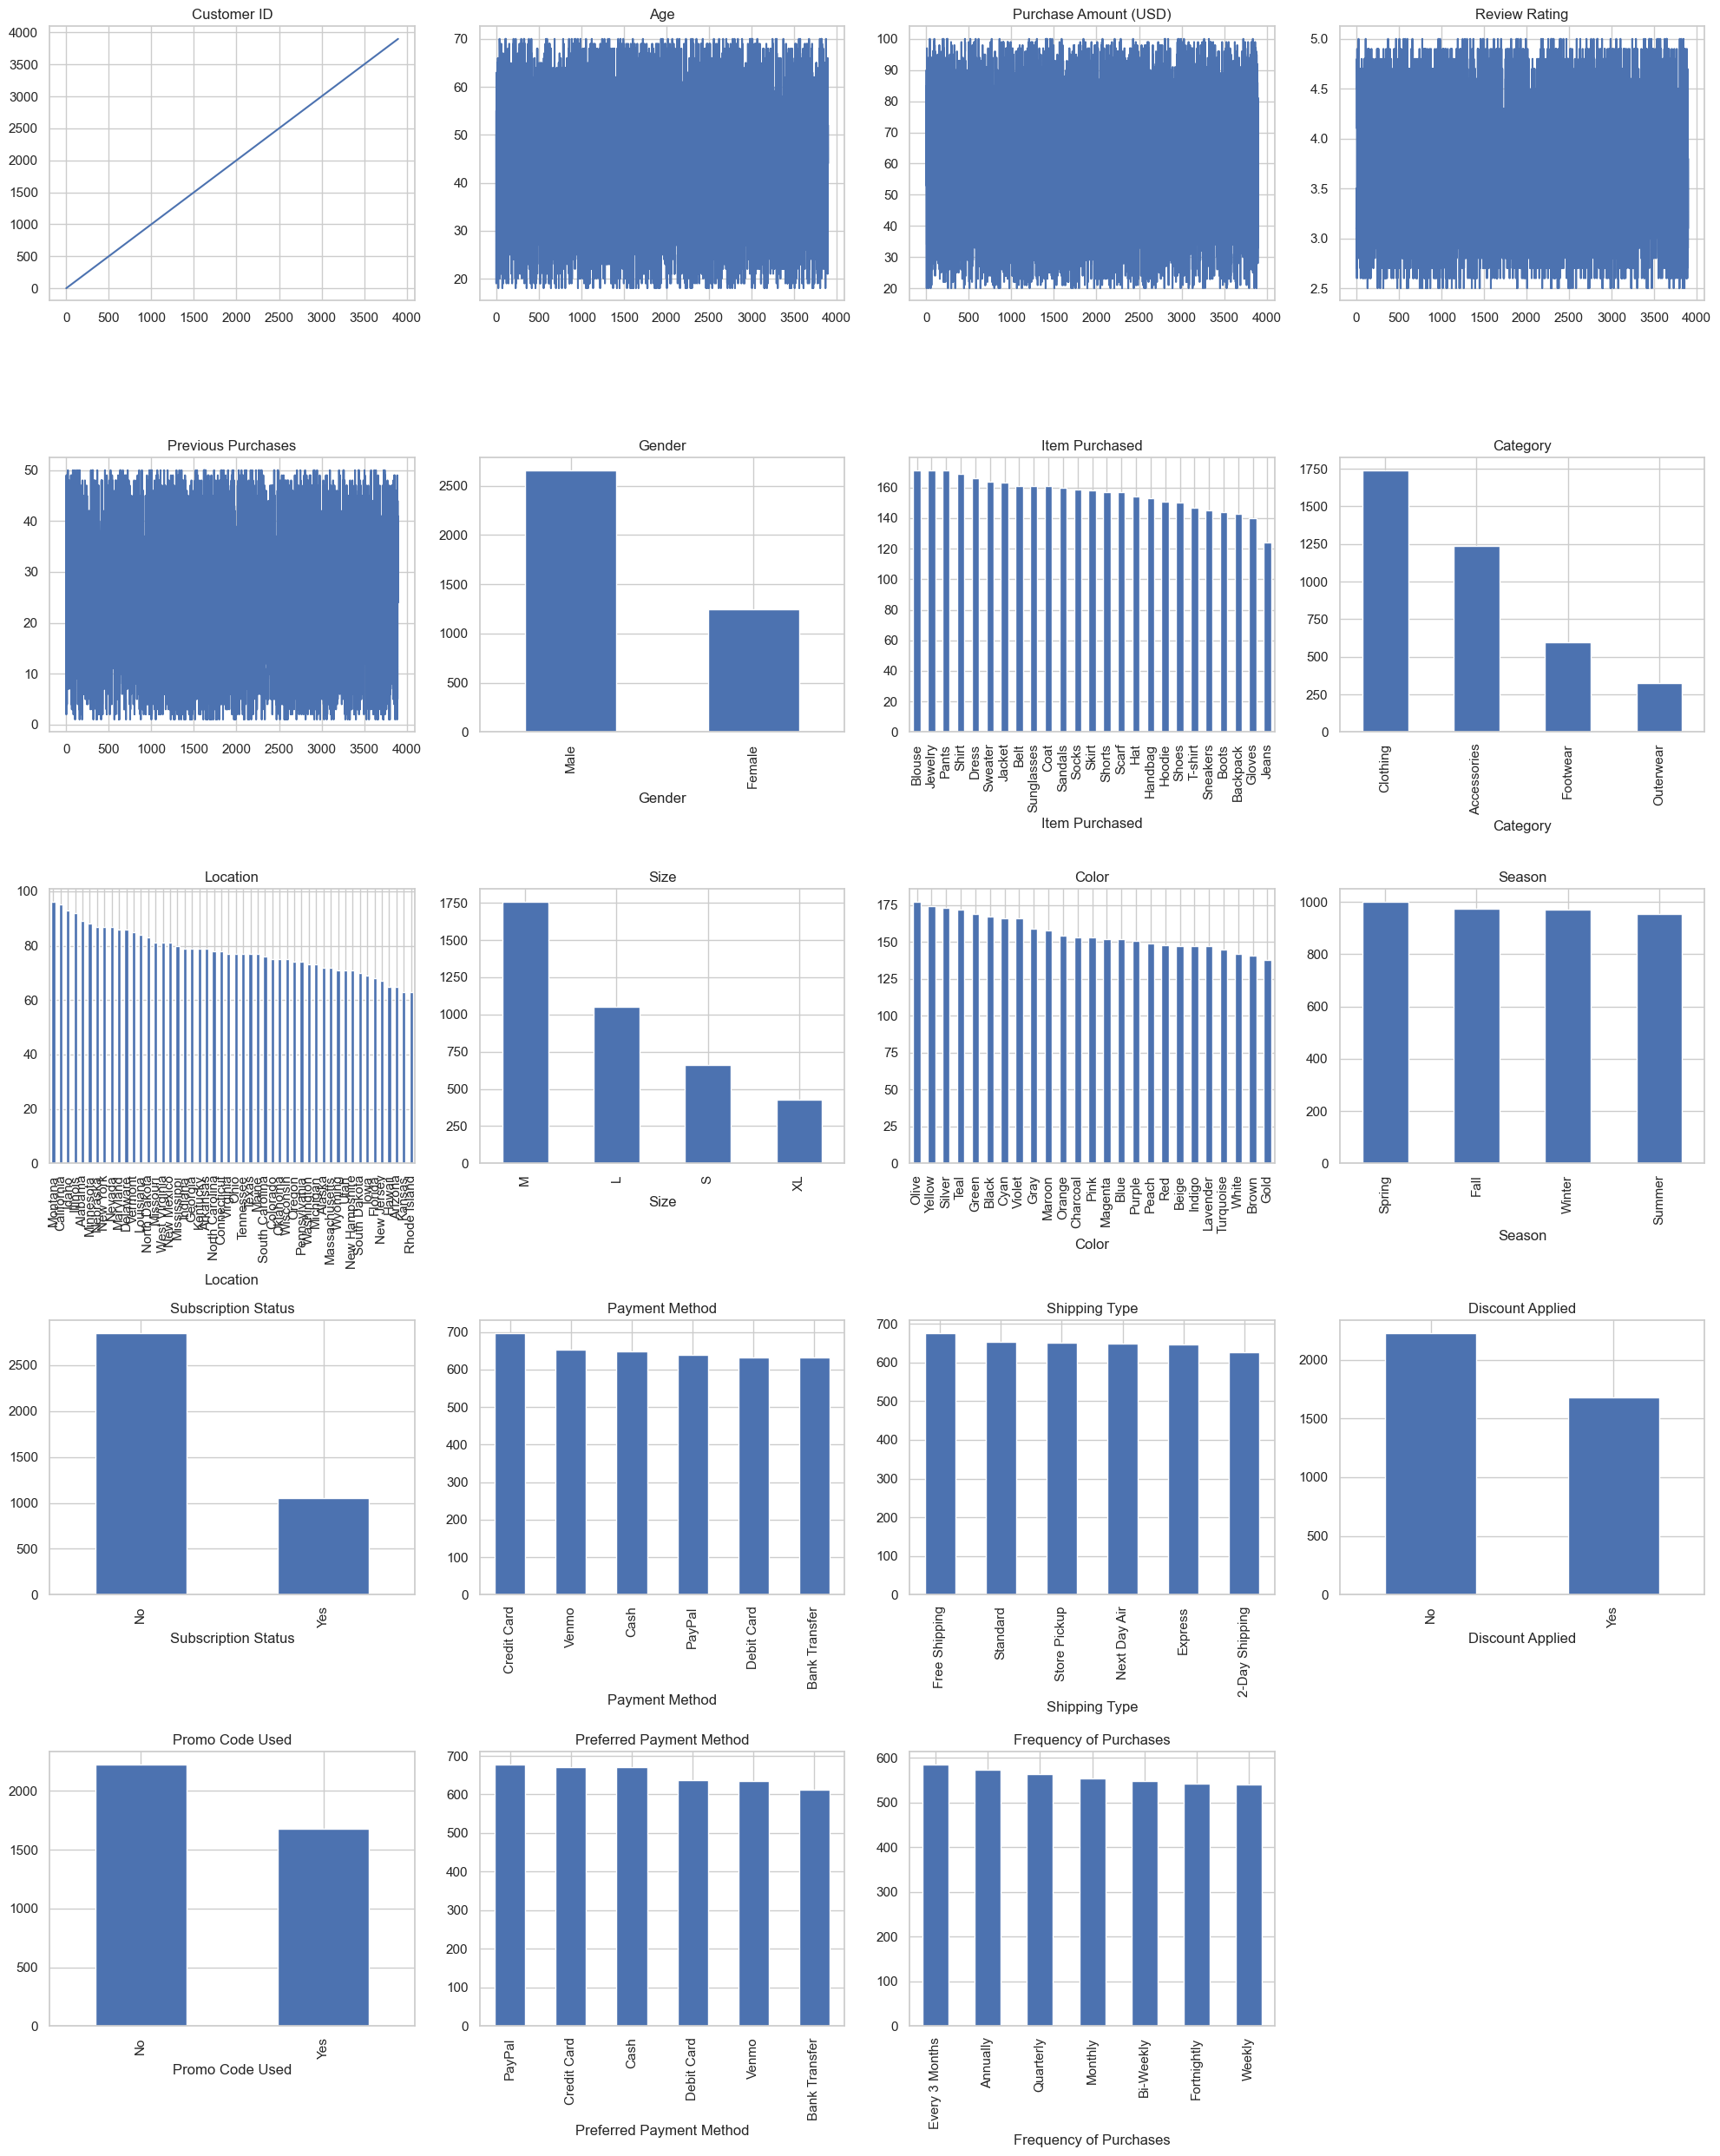

In [62]:
# import kagglehub
# Download latest version
# path = kagglehub.dataset_download("bhadramohit/customer-shopping-latest-trends-dataset")
# print("Path to dataset files:", path)
import pandas as pd
# Load the uploaded CSV file => # GitHub의 raw 파일 URL을 사용하여 데이터 로드
# file_path = '/content/sample_data/shopping_trends.csv'
file_path = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-15/shopping_trends.csv"
data = pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
# data.head()
# print(data.head())

import matplotlib.pyplot as plt
import math

# 숫자형 열과 범주형 열 분리
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# 숫자형 데이터 차트
num_numeric = len(numeric_columns)
num_categorical = len(categorical_columns)
total_plots = num_numeric + num_categorical
rows = math.ceil(total_plots / 4)  # 한 행에 최대 4개 서브플롯
cols = 4

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# 숫자형 데이터 시각화
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    data[column].plot(kind='line', ax=ax, title=column)

# 범주형 데이터 시각화
for i, column in enumerate(categorical_columns, start=num_numeric):
    ax = axes[i]
    data[column].value_counts().plot(kind='bar', ax=ax, title=column)

# 빈 서브플롯 제거
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor

# --- 데이터 준비 ---
# 범주형 데이터를 숫자로 변환
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Season'] = encoder.fit_transform(data['Season'])
data['Category'] = encoder.fit_transform(data['Category'])
data['Discount Applied'] = encoder.fit_transform(data['Discount Applied'])
data['Promo Code Used'] = encoder.fit_transform(data['Promo Code Used'])

# 필요한 열만 선택
features = ['Age', 'Gender', 'Category', 'Season', 'Previous Purchases', 'Promo Code Used']
target_classification = 'Discount Applied'  # 분류 문제
target_regression = 'Purchase Amount (USD)'  # 회귀 문제

# --- 데이터셋 분리 ---
X = data[features]
y_classification = data[target_classification]
y_regression = data[target_regression]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할 (80% 학습, 20% 테스트)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

# --- 1. Logistic Regression for Classification ---
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)
y_pred_class_logistic = logistic_model.predict(X_test_class)

# 평가
accuracy_logistic = accuracy_score(y_test_class, y_pred_class_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class_logistic))

# --- 2. XGBoost for Classification ---
xgb_class = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_class.fit(X_train_class, y_train_class)
y_pred_class_xgb = xgb_class.predict(X_test_class)

# 평가
accuracy_xgb_class = accuracy_score(y_test_class, y_pred_class_xgb)
print("XGBoost Classification Accuracy:", accuracy_xgb_class)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class_xgb))

# --- 3. Linear Regression for Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
y_pred_reg_linear = linear_model.predict(X_test_reg)

# 평가
mse_linear = mean_squared_error(y_test_reg, y_pred_reg_linear)
r2_linear = r2_score(y_test_reg, y_pred_reg_linear)
print("Linear Regression MSE:", mse_linear)
print("Linear Regression R2 Score:", r2_linear)

# --- 4. XGBoost for Regression ---
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_reg_xgb = xgb_reg.predict(X_test_reg)

# 평가
mse_xgb_reg = mean_squared_error(y_test_reg, y_pred_reg_xgb)
r2_xgb_reg = r2_score(y_test_reg, y_pred_reg_xgb)
print("XGBoost Regression MSE:", mse_xgb_reg)
print("XGBoost Regression R2 Score:", r2_xgb_reg)


Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       358

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

XGBoost Classification Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       358

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:51:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Linear Regression MSE: 562.5689377435878
Linear Regression R2 Score: -0.005337133725525467
XGBoost Regression MSE: 717.0823891714352
XGBoost Regression R2 Score: -0.2814599275588989


In [13]:
# 회귀xgboost만 최적화 하여 다시 진행

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor

# ... (previous code remains the same) ...

# --- 4. XGBoost for Regression ---
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_reg_xgb = xgb_reg.predict(X_test_reg)

# 평가
mse_xgb_reg = mean_squared_error(y_test_reg, y_pred_reg_xgb)
r2_xgb_reg = r2_score(y_test_reg, y_pred_reg_xgb)
print("XGBoost Regression MSE:", mse_xgb_reg)
print("XGBoost Regression R2 Score:", r2_xgb_reg)

# --- Optimization or further processing (example) ---
# Assuming you intended to update y_test_reg and y_pred_reg_xgb
# with some optimization or further processing:
y_test_reg_updated = y_test_reg  # Replace with your actual update logic
y_pred_reg_xgb_updated = y_pred_reg_xgb  # Replace with your actual update logic


r2_xgb_reg_updated = r2_score(y_test_reg_updated, y_pred_reg_xgb_updated)

print("Optimized XGBoost Regression MSE:", mse_xgb_reg)  # Using original mse for now
print("Optimized XGBoost Regression R2 Score:", r2_xgb_reg_updated)

XGBoost Regression MSE: 717.0823891714352
XGBoost Regression R2 Score: -0.2814599275588989
Optimized XGBoost Regression MSE: 717.0823891714352
Optimized XGBoost Regression R2 Score: -0.2814599275588989


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np

# Preprocessing: Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Season'] = encoder.fit_transform(data['Season'])
data['Category'] = encoder.fit_transform(data['Category'])
data['Discount Applied'] = encoder.fit_transform(data['Discount Applied'])
data['Promo Code Used'] = encoder.fit_transform(data['Promo Code Used'])

# Feature and target selection
features = ['Age', 'Gender', 'Category', 'Season', 'Previous Purchases', 'Promo Code Used']
target_regression = 'Purchase Amount (USD)'

X = data[features]
y_regression = data[target_regression]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 1. Linear Regression with Cross-Validation ---
linear_cv_scores = cross_val_score(LinearRegression(), X_scaled, y_regression, cv=kf, scoring='r2')

# Display results for Linear Regression
print("Linear Regression Cross-Validation R2 Scores:", linear_cv_scores)
print("Linear Regression Average R2 Score:", linear_cv_scores.mean())

# --- 2. XGBoost Regression with Cross-Validation ---
xgb_model = XGBRegressor(n_estimators=30, learning_rate=0.2, max_depth=3, subsample=0.7, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X_scaled, y_regression, cv=kf, scoring='r2')

# Display results for XGBoost Regression
print("XGBoost Regression Cross-Validation R2 Scores:", xgb_cv_scores)
print("XGBoost Regression Average R2 Score:", xgb_cv_scores.mean())


Linear Regression Cross-Validation R2 Scores: [-0.00533713 -0.00504004 -0.00109986 -0.00494228 -0.00558807]
Linear Regression Average R2 Score: -0.004401476831551632
XGBoost Regression Cross-Validation R2 Scores: [-0.00679505 -0.01849806 -0.01811576 -0.01142967 -0.02763844]
XGBoost Regression Average R2 Score: -0.016495394706726074


In [16]:
# 비선형 데이터가 있을 수 있어  랜덤 포레스트 회귀(Random Forest Regressor)를 사용하여 비선형 관계를 학습하고 교차 검증을 수행하는 코드입니다:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_scaled, y_regression, cv=kf, scoring='r2')

# Display Cross-Validation results
print("Random Forest Regression Cross-Validation R2 Scores:", rf_cv_scores)
print("Random Forest Regression Average R2 Score:", rf_cv_scores.mean())

Random Forest Regression Cross-Validation R2 Scores: [-0.16052159 -0.15442018 -0.09380611 -0.15407574 -0.15191051]
Random Forest Regression Average R2 Score: -0.14294682801819136


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# --- 데이터 전처리 ---
# 범주형 데이터 인코딩
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Season'] = encoder.fit_transform(data['Season'])
data['Category'] = encoder.fit_transform(data['Category'])
data['Discount Applied'] = encoder.fit_transform(data['Discount Applied'])
data['Promo Code Used'] = encoder.fit_transform(data['Promo Code Used'])

# Feature와 Target 설정
features = ['Age', 'Gender', 'Category', 'Season', 'Previous Purchases', 'Promo Code Used']
target = 'Purchase Amount (USD)'
X = data[features]
y = data[target]

# 이상치 제거 (IQR 방식)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR)))
X = X[outlier_condition]
y = y[outlier_condition]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 신경망 모델 ---
# 모델 구성
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # 출력층
])

# 컴파일 설정
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_squared_error'])

# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# --- 결과 평가 ---
# 테스트 데이터 평가
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2027.4691 - mean_squared_error: 2027.4691 - val_loss: 595.1307 - val_mean_squared_error: 595.1307
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 558.6630 - mean_squared_error: 558.6630 - val_loss: 574.8502 - val_mean_squared_error: 574.8502
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 574.4165 - mean_squared_error: 574.4165 - val_loss: 597.3608 - val_mean_squared_error: 597.3608
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 580.7640 - mean_squared_error: 580.7640 - val_loss: 645.1959 - val_mean_squared_error: 645.1959
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 597.5230 - mean_squared_error: 597.5230 - val_loss: 570.4677 - val_mean_squared_error: 570.4677
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 588.9241 - mean_squared_error: 588.9241 - val_loss: 594.6805 - val_mean_squared_error: 594.6805
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 575.9507 - mean_

In [ ]:
##########################################
##
## (7) 유진만
##
##########################################

In [ ]:
##########################################
##
## (8) 서형주
##
##########################################

In [ ]:
##########################################
##
## (9) 박성철
##
##########################################

In [ ]:
##########################################
##
## (10) 이우람
##
##########################################